In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
df = pd.read_csv('cpdata.csv')

In [ ]:
df.head()

,temperature,humidity,ph,rainfall,labels
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,temperature,humidity,ph,rainfall,labels
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon
3099,26.986037,89.413849,6.260839,58.548767,watermelon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   labels       3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [ ]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [ ]:
maxval = df.max()
print(maxval)

temperature     54.98676
humidity       99.981876
ph              9.935091
rainfall       397.31538
labels             wheat
dtype: object


In [ ]:
minval = df.min()
print(minval)

temperature        8.825675
humidity          10.034048
ph                 3.504752
rainfall          20.211267
labels         Adzuki Beans
dtype: object


In [ ]:
df["labels"].value_counts()

rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: labels, dtype: int64

In [ ]:
df['labels'].nunique()

31

In [ ]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
labels         0
dtype: int64

<Axes: >

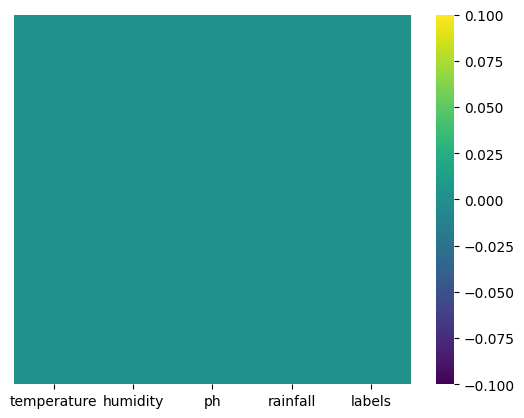

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

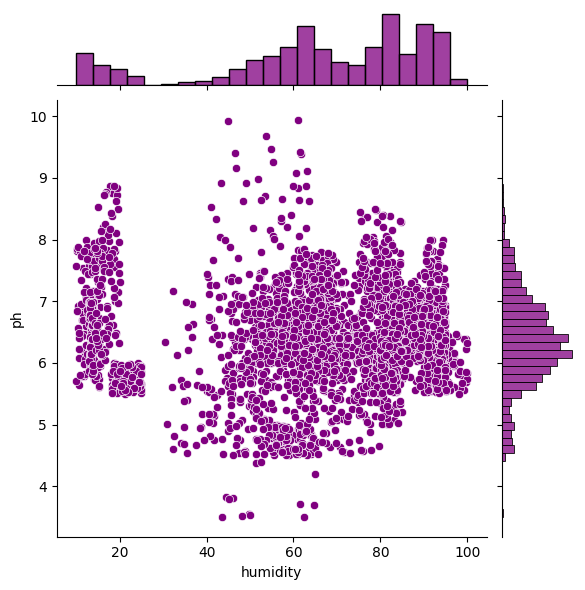

In [ ]:
sns.jointplot(data=df,x='humidity',y='ph',color='purple')

<Axes: xlabel='temperature', ylabel='Density'>

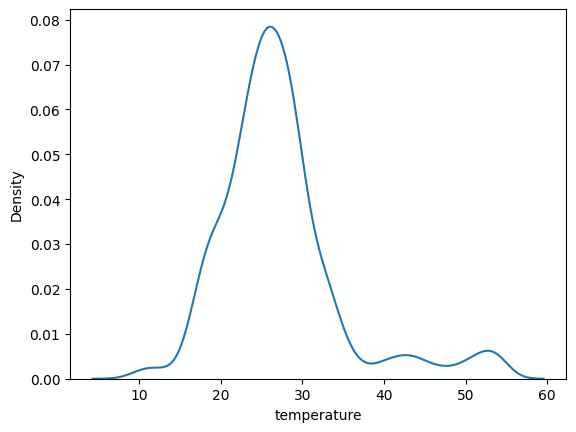

In [ ]:
sns.kdeplot(df['temperature'])

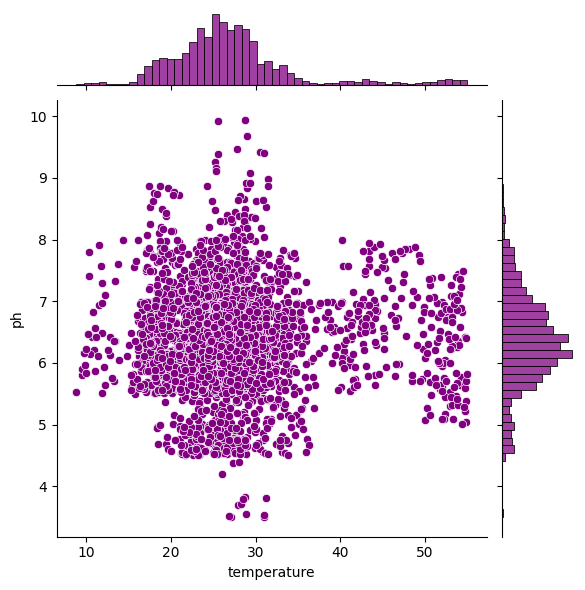

In [ ]:
sns.jointplot(data=df,x='temperature',y='ph',color='purple')

<Axes: ylabel='Frequency'>

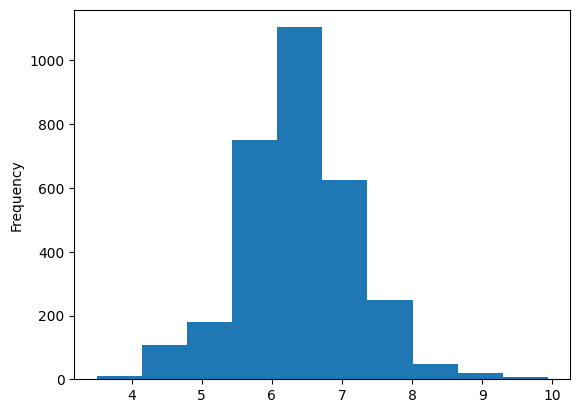

In [ ]:
df["ph"].plot.hist()

In [ ]:
new= df.drop('rainfall',axis=1)

In [ ]:
new.head()

,temperature,humidity,ph,labels
0,20.879744,82.002744,6.502985,rice
1,21.770462,80.319644,7.038096,rice
2,23.004459,82.320763,7.840207,rice
3,26.491096,80.158363,6.980401,rice
4,20.130175,81.604873,7.628473,rice


# Train Test Split
Let's split up the data into a training set and a test set!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = new.drop('labels',axis=1)
y = new['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf_prediction = dtree.predict(X_test)

In [ ]:
dtree.predict([[20.8,82.0,6.5]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'rice'

In [ ]:
predictions=dtree.predict(X_test)

In [ ]:
import pickle

In [ ]:
file=open('crop_pred_dtree.pkl','wb')
pickle.dump(dtree,file)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       0.61      0.59      0.60        32
    Chickpea       0.94      1.00      0.97        32
     Coconut       0.90      0.87      0.88        30
      Coffee       0.38      0.34      0.36        35
      Cotton       0.62      0.48      0.55        31
  Ground Nut       0.95      0.92      0.93        38
        Jute       0.39      0.44      0.42        25
Kidney Beans       1.00      0.92      0.96        25
      Lentil       0.31      0.33      0.32        33
  Moth Beans       0.58      0.67      0.62        27
   Mung Bean       0.76      0.96      0.85        27
        Peas       1.00      1.00      1.00        36
 Pigeon Peas       0.60      0.40      0.48        30
      Rubber       0.59      0.76      0.67        25
   Sugarcane       0.64      0.52      0.57        31
         Tea       0.89      0.89      0.89        27
     Tobacco       0.69    

<Axes: >

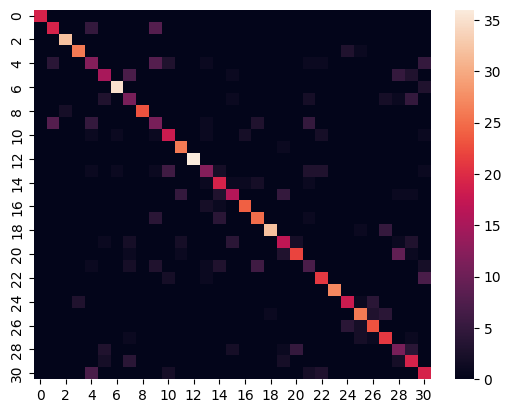

In [ ]:
y_predict_test=dtree.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)

sns.heatmap(cm)


In [ ]:
#print(cm)

In [ ]:
print("Total Accuracy DecisionTree:",accuracy_score(y_test,y_predict_test))

Total Accuracy DecisionTree: 0.6903225806451613


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier()

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
input_features=[20.8,82.0,6.5]
infprob=clf.predict([input_features])[0]
infprob

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'rice'

In [ ]:
predictions=clf.predict(X_test)

In [ ]:
file=open('crop_pred_rand.pkl','wb')
pickle.dump(clf,file)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       0.59      0.69      0.64        32
    Chickpea       0.97      1.00      0.98        32
     Coconut       0.96      0.87      0.91        30
      Coffee       0.45      0.43      0.44        35
      Cotton       0.53      0.52      0.52        31
  Ground Nut       0.95      1.00      0.97        38
        Jute       0.30      0.36      0.33        25
Kidney Beans       1.00      0.96      0.98        25
      Lentil       0.25      0.15      0.19        33
  Moth Beans       0.67      0.67      0.67        27
   Mung Bean       0.77      1.00      0.87        27
        Peas       1.00      1.00      1.00        36
 Pigeon Peas       0.83      0.33      0.48        30
      Rubber       0.70      0.84      0.76        25
   Sugarcane       0.64      0.45      0.53        31
         Tea       0.89      0.93      0.91        27
     Tobacco       0.69    

<Axes: >

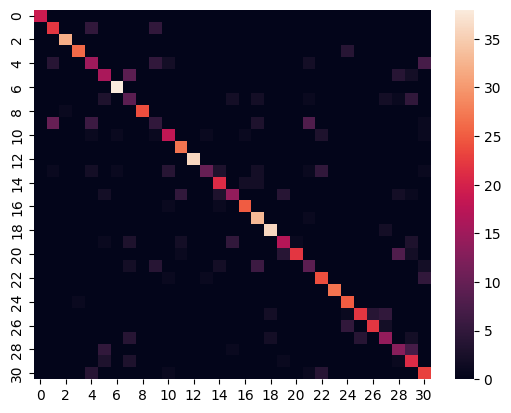

In [ ]:
y_predict=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predict)

sns.heatmap(cm)


In [ ]:
print("Total Accuracy RandomForest:",accuracy_score(y_test,y_predict))

Total Accuracy RandomForest: 0.7150537634408602


# K-Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3 )  
knn.fit(X_train, y_train)  

KNeighborsClassifier(p=3)

In [ ]:
KNNINT=[20.8,82.0,1.3]
result=knn.predict([KNNINT])[0]
result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'rice'

In [ ]:
knnprediction=knn.predict(X_test)

In [ ]:
file=open('crop_pred_knn.pkl','wb')
pickle.dump(knn,file)

In [ ]:
print(classification_report(y_test,knnprediction))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       0.58      0.69      0.63        32
    Chickpea       0.97      0.97      0.97        32
     Coconut       0.88      0.77      0.82        30
      Coffee       0.46      0.49      0.47        35
      Cotton       0.49      0.61      0.54        31
  Ground Nut       0.64      0.74      0.68        38
        Jute       0.29      0.32      0.30        25
Kidney Beans       0.96      0.96      0.96        25
      Lentil       0.28      0.27      0.28        33
  Moth Beans       0.56      0.33      0.42        27
   Mung Bean       0.60      0.93      0.72        27
        Peas       1.00      1.00      1.00        36
 Pigeon Peas       0.62      0.27      0.37        30
      Rubber       0.43      0.36      0.39        25
   Sugarcane       0.65      0.35      0.46        31
         Tea       0.75      0.89      0.81        27
     Tobacco       0.51    

<Axes: >

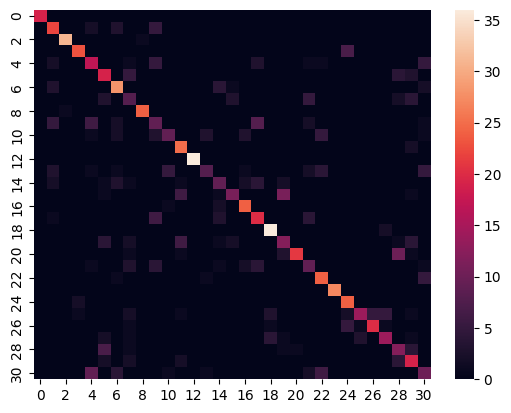

In [ ]:
y_predict=knn.predict(X_test)
knncm=confusion_matrix(y_test,y_predict)

sns.heatmap(knncm)

In [ ]:
print("Total Accuracy KNN:",accuracy_score(y_test,y_predict))

Total Accuracy KNN: 0.6279569892473118


# Support Vector Machine Algorithm(SVM)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0)  
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
SVC=[26.986037,89.413849,6.260839]
results=svc.predict([SVC])[0]
results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'watermelon'

In [ ]:
svcprediction=svc.predict(X_test)

In [ ]:
file=open('crop_pred_svc.pkl','wb')
pickle.dump(svc,file)

<Axes: >

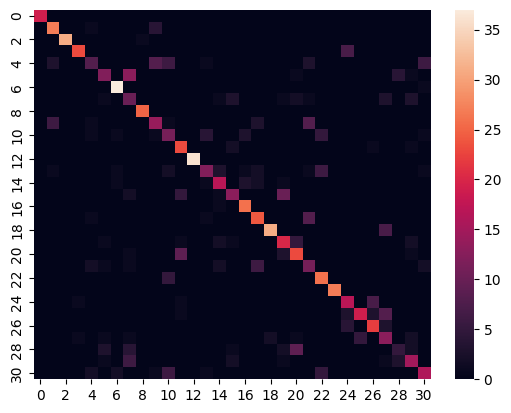

In [ ]:
y_predict=svc.predict(X_test)
svccm=confusion_matrix(y_test,y_predict)

sns.heatmap(svccm)

In [ ]:
print("Total Accuracy SVC:",accuracy_score(y_test,y_predict))

Total Accuracy SVC: 0.6591397849462366


In [ ]:
!python3 "main.py"

2023-05-15 19:21:02.344 
  command:

    streamlit run main.py [ARGUMENTS]
2023-05-15 19:21:02.355 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).


In [ ]:
!streamlit run main.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.167.174:8501

  Stopping...
  Stopping...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1065, in main
    ctx.exit()
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 687, in exit
    raise Exit(code)
click.exceptions.Exit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1054, in main
    with self.make_context(prog_name, args, **extra) as ctx:
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 461, in __exit__
    self.close()
  File "/usr/loc

In [ ]:
!streamlit run main.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.725s
your url is: https://tame-books-change.loca.lt


In [ ]:
!pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
